## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv("hotel_booking.csv")
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
90771,City Hotel,0,70,2016,June,24,10,0,2,2,...,Transient,85.0,0,1,Check-Out,2016-06-12,Susan Edwards,Edwards_Susan41@aol.com,877-552-1734,************1101
30460,Resort Hotel,0,14,2016,November,48,21,1,1,2,...,Transient,0.0,0,1,Check-Out,2016-11-23,Sandra Poole,Sandra.P@mail.com,811-465-4384,************1699
39431,Resort Hotel,0,2,2017,August,33,17,0,1,2,...,Transient-Party,231.0,0,3,Check-Out,2017-08-18,Patrick Smith,Patrick_S@mail.com,694-882-0773,************8079
89093,City Hotel,0,45,2016,May,21,15,2,0,2,...,Transient,126.1,0,0,Check-Out,2016-05-17,Kristin Obrien,Obrien.Kristin@comcast.net,402-762-7307,************1682
27659,Resort Hotel,0,185,2016,August,36,29,2,5,1,...,Transient,101.6,0,1,Check-Out,2016-09-05,Danielle Carney,DanielleCarney@att.com,173-578-5126,************6233


- <b> hotel </b> : The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city.
- <b>'is_canceled'</b> : Value indicating if the booking was canceled (1) or not (0).
- 'lead_time' : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
- 'arrival_date_year' : Year of arrival date
- 'arrival_date_month' : Month of arrival date with 12 categories: “January” to “December”
- 'arrival_date_week_number' : Week number of the arrival date
- 'arrival_date_day_of_month' : Day of the month of the arrival date
- 'stays_in_weekend_nights': Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- 'stays_in_week_nights' : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by
- 'adults' : Number of adults
- 'children' : Number of childrens
'babies', 
'meal'
'country', 
'market_segment',
'distribution_channel'
'is_repeated_guest'
'previous_cancellations'
'previous_bookings_not_canceled',
'reserved_room_type', 
'assigned_room_type', 
'booking_changes',
'deposit_type',
'agent',
'company',
'days_in_waiting_list', 
'customer_type',
'adr',
'required_car_parking_spaces', 
'total_of_special_requests',
'reservation_status',
'reservation_status_date', 
'name', 
'email',
'phone-number',
'credit_card'


## Exploratory Data Analysis and Data Cleaning

In [3]:
# finding total no. of rows and columns
df.shape

(119390, 36)

In [4]:
# checking datatypes of all the columns
print(df.info(),"\n ------------","\n", df.isnull().mean()*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

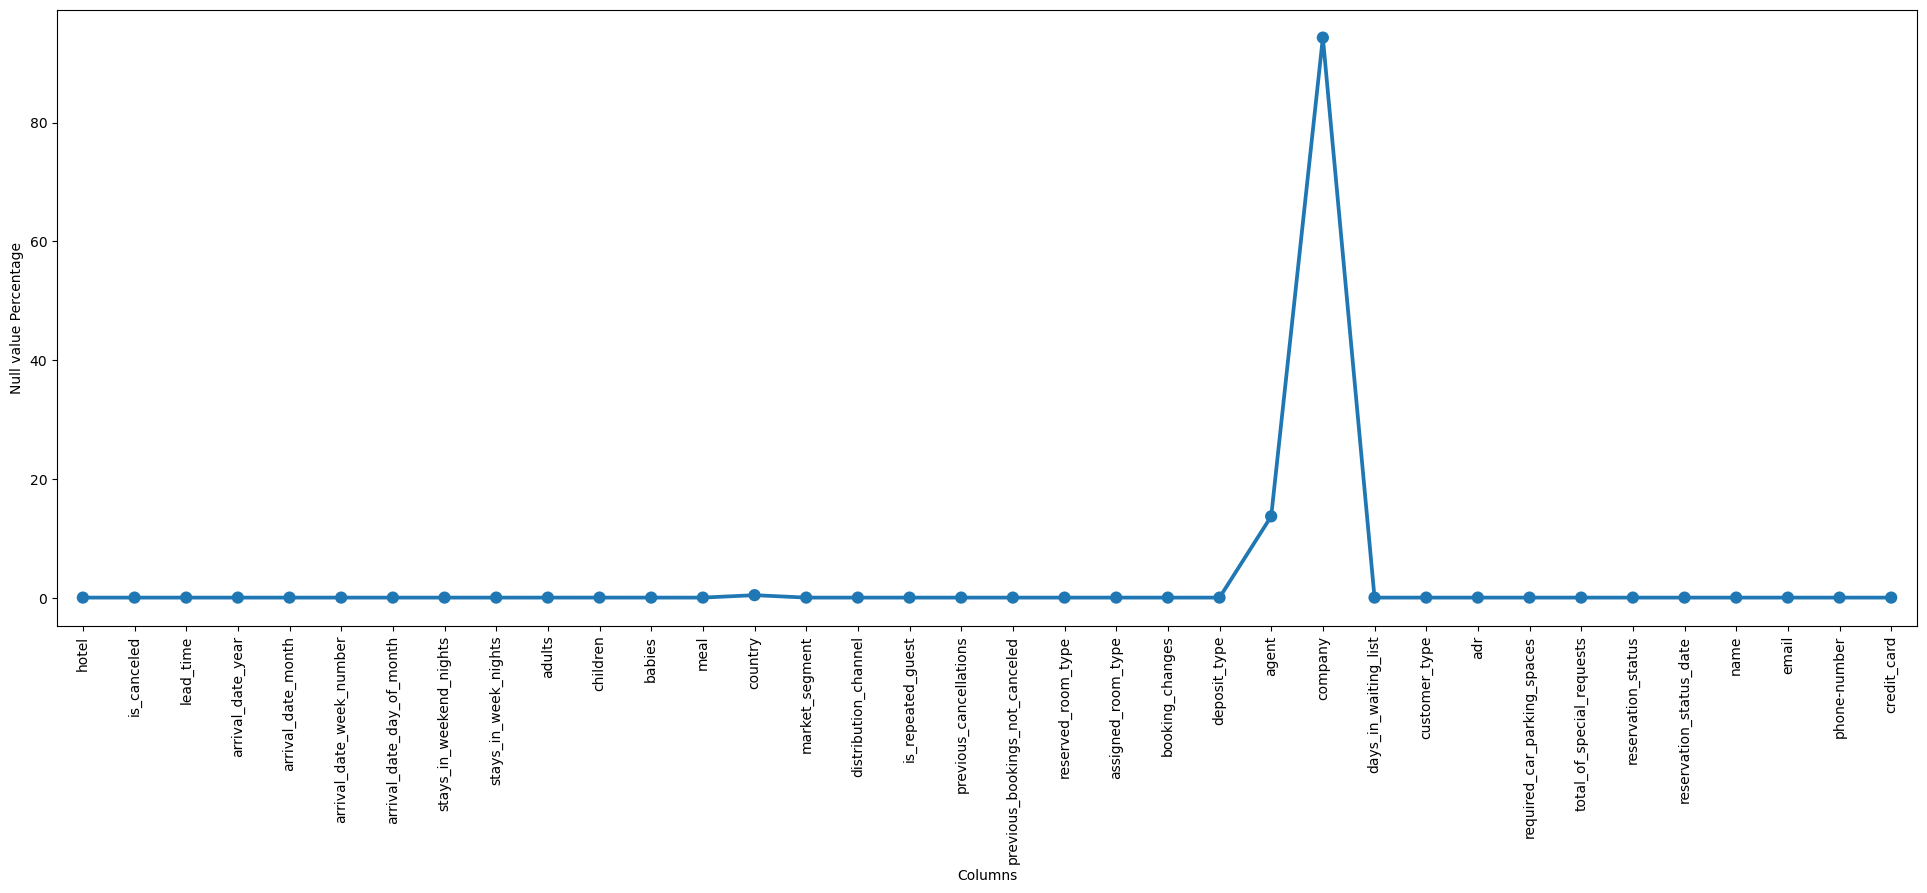

In [5]:
# finding null values
missing_data = df.isnull().mean()*100

# creating a pointplot
plt.figure(figsize = (24,8))
sns.pointplot(x= missing_data.index, y=missing_data.values)

# Customise the plot for better readability
plt.xlabel("Columns")
plt.ylabel("Null value Percentage")
plt.xticks(rotation=90)

#show the plot
plt.show()

In [6]:
#finding the col name having less than 5% of null values
def df_null_col(df):
    cca=[]
    for col in df.columns:
        if (df[col].isnull().mean()*100)<5 and (df[col].isnull().mean()*100)>0:
            cca.append(col)
    return cca

In [7]:
df_null_col(df)

['children', 'country']

In [8]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [9]:
df.describe(include='int')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,8.000000,5.000000


In [10]:
# changing Datatype of column from object to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date'].dtypes

dtype('<M8[ns]')

In [11]:
# drop unwanted columns
new_df = df.drop(columns=['name','email','phone-number','credit_card'],axis = 1)
new_df.shape

(119390, 32)

In [12]:
# finding unique values of all the object type columns
for col in new_df.describe(include='object').columns:
    print(col)
    print(new_df[col].unique())
    print("-"*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [13]:
# Handling missing Values

# Dropping the high null value col
new_df.drop(['company','agent'], axis=1, inplace=True)

# Drop the null value rows
new_df.dropna(inplace=True)

# Finally checking missing values
new_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
new_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


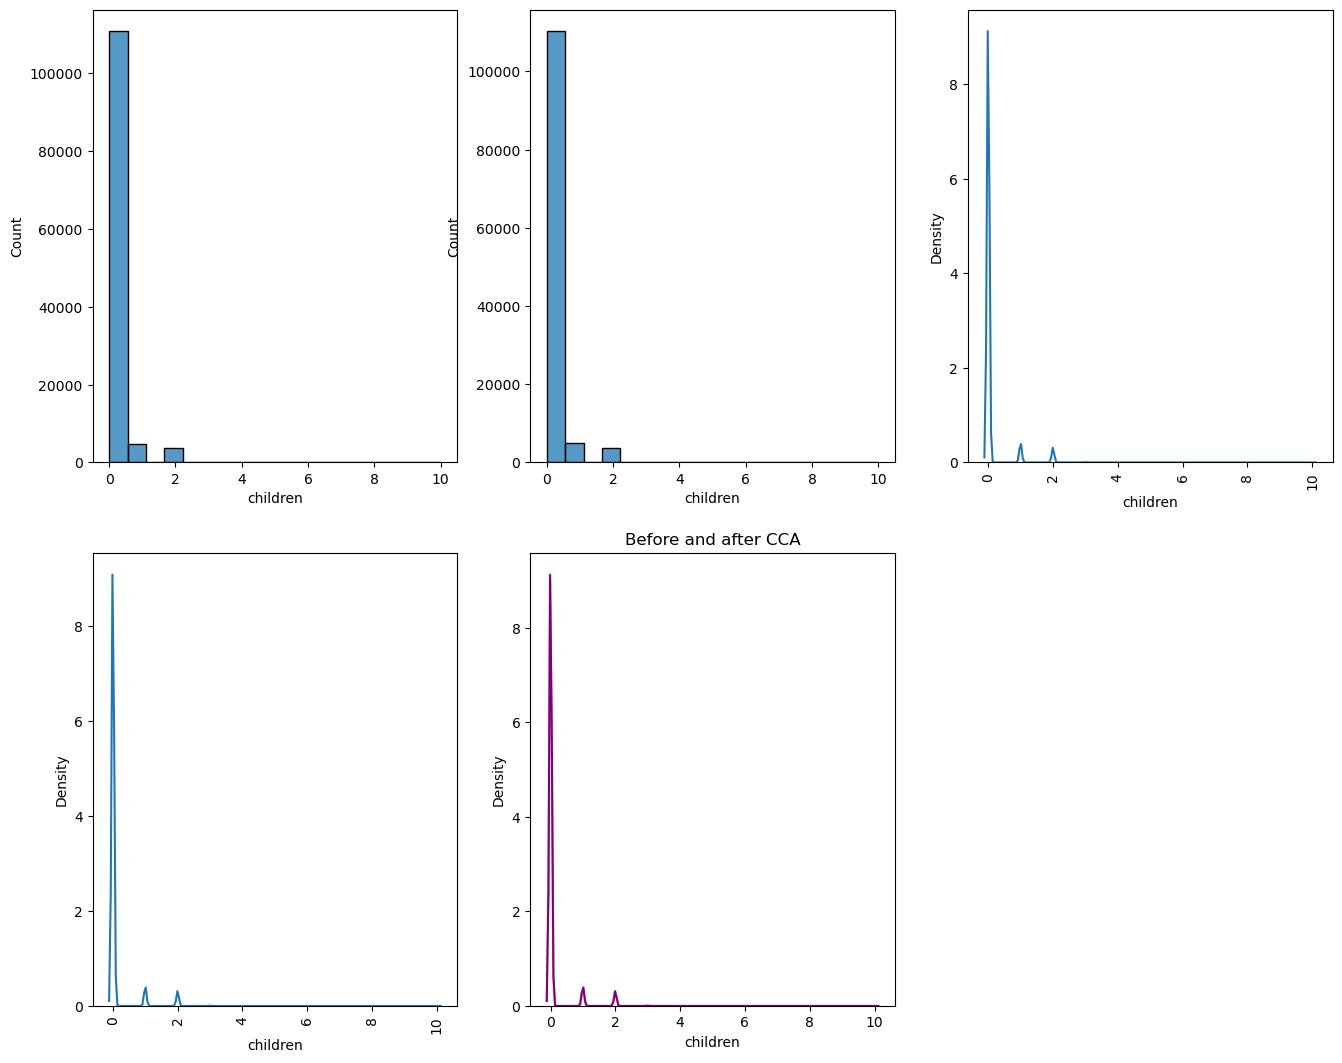

In [15]:
# checking the distribution of drop numerical data

plt.figure(figsize = (16,20))

plt.subplot(3,3,1)
sns.histplot(df['children'])

plt.subplot(3,3,2)
sns.histplot(new_df['children'])

plt.subplot(3,3,3)
sns.kdeplot(df['children'])
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.kdeplot(new_df['children'])
plt.xticks(rotation=90)

# after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
plt.subplot(3,3,5)
sns.kdeplot(df['children'],color='red')
sns.kdeplot(new_df['children'],alpha = 0.5, color = 'blue')
plt.title('Before and after CCA')

plt.show()

In [16]:
level = pd.concat([
            # percentage of observations per category, original data
            df['country'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['country'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
level.columns = ['original', 'cca']

level

,original,cca
country,,
PRT,0.406986,0.408636
GBR,0.101591,0.102012
FRA,0.087235,0.087596
ESP,0.071765,0.072062
DEU,0.061035,0.061288
...,...,...
DJI,0.000008,0.000008
BWA,0.000008,0.000008
HND,0.000008,0.000008


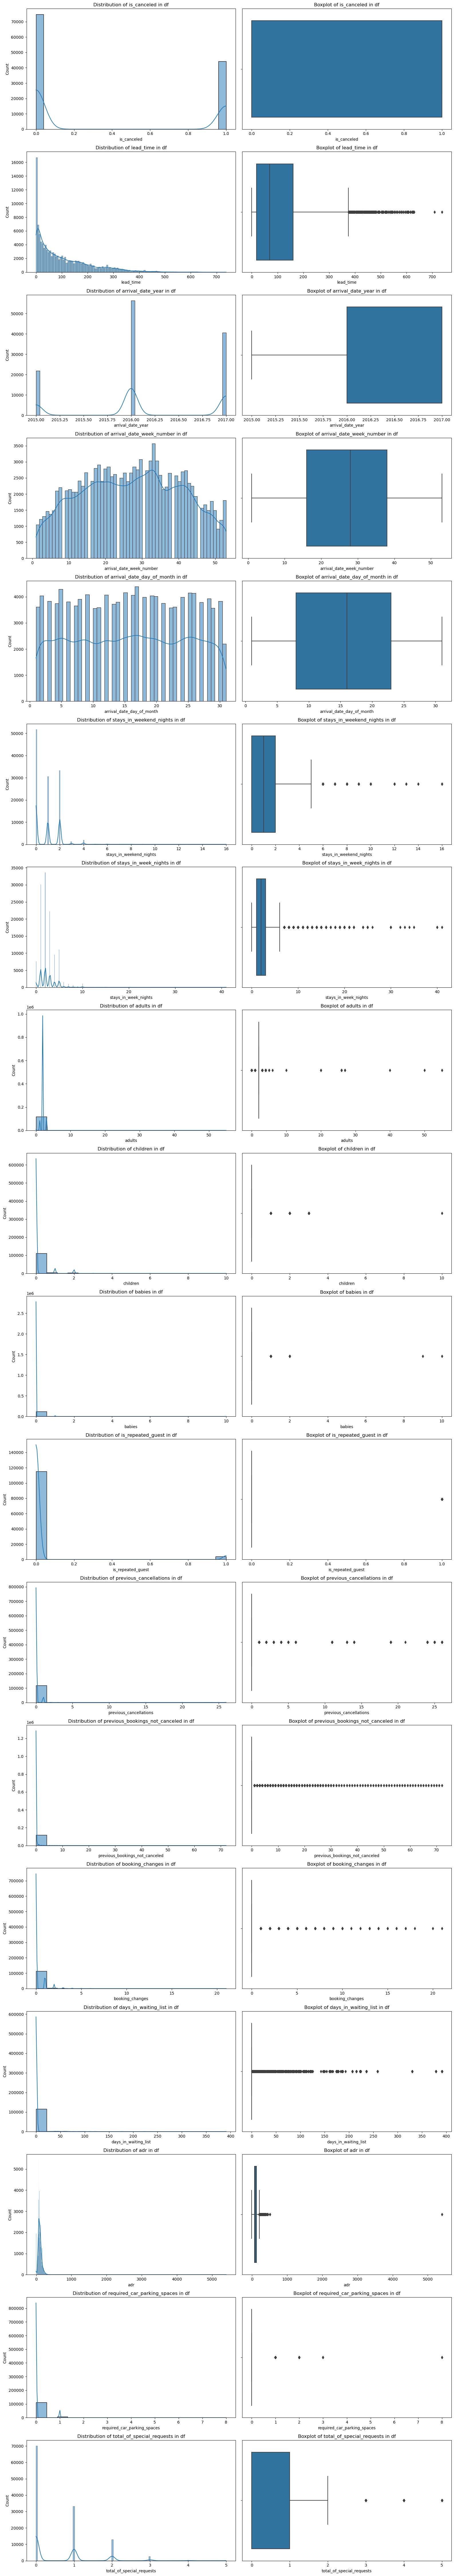

In [17]:
# Select numerical columns
numerical_cols = new_df.select_dtypes(include='number').columns  # or by using df.describe(include = 'int')

# Determine the number of subplots needed
n_cols = len(numerical_cols)

# Create subplots
fig, axes = plt.subplots(n_cols, 2, figsize=(16, 5 * n_cols))

# Plot distribution and box plots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(new_df[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribution of {col} in df')

    sns.boxplot(x=new_df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col} in df')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
# trimming outliers from adr col
new_df1 = new_df[new_df['adr']<5000]

## Data Analysis and Visualization

In [19]:
new_df1.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2200,Resort Hotel,0,1,2015,October,41,5,1,1,2,...,G,0,No Deposit,0,Group,61.5,0,1,Check-Out,2015-10-07


is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


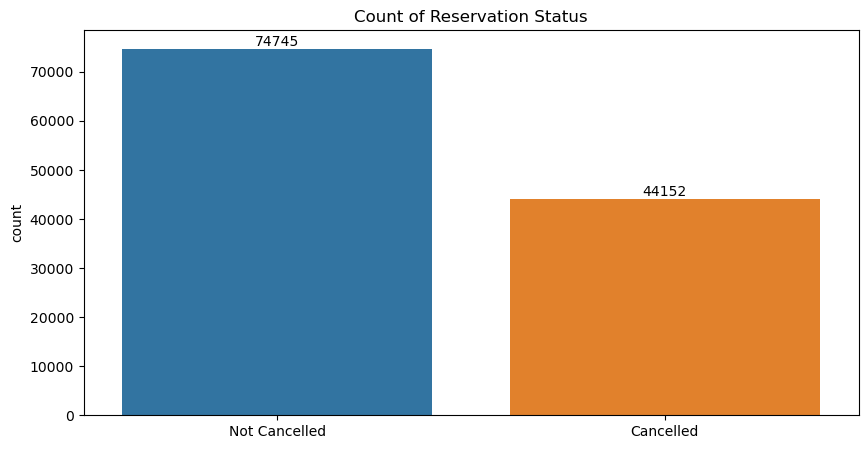

In [20]:
# finding percentage of value counts
cancelled_perc = new_df1['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

# ploting bar to visualise the data
plt.figure(figsize=(10,5))
plt.title("Count of Reservation Status")
ax = sns.barplot(x=['Not Cancelled','Cancelled'],y= new_df1['is_canceled'].value_counts())

ax.bar_label(ax.containers[0])
plt.show()

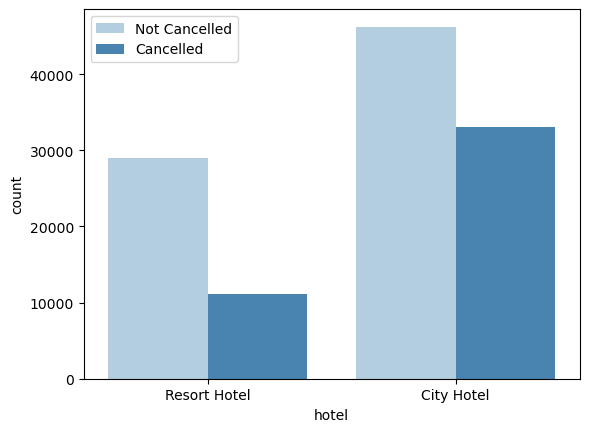

In [21]:
# checking cancellation and non-cancellation rate according to hotel
hotel_distribution = new_df1['hotel'].value_counts()
hotel_distribution

# plotting graph
# ax1 = sns.countplot(x=df['hotel'])

ax2 = sns.countplot(x=df['hotel'], hue=df['is_canceled'],palette='Blues')

# Renaming hue labels
h, l = ax2.get_legend_handles_labels()
ax2.legend(h, ['Not Cancelled', 'Cancelled'], title='')

plt.show()

In [22]:
ax2.get_legend_handles_labels()

([<BarContainer object of 2 artists>, <BarContainer object of 2 artists>],
 ['0', '1'])

In [23]:
Resort_Hotel = new_df1[new_df1['hotel']== "Resort Hotel"]
Resort_Hotel['is_canceled'].value_counts(normalize=True)*100

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [24]:
City_Hotel = new_df1[new_df1['hotel']== "City Hotel"]
City_Hotel['is_canceled'].value_counts(normalize=True)*100

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

market_segment
Online TA        17655
Offline TA/TO     7427
Direct            6357
Groups            5832
Corporate         2126
Complementary      199
Name: count, dtype: int64


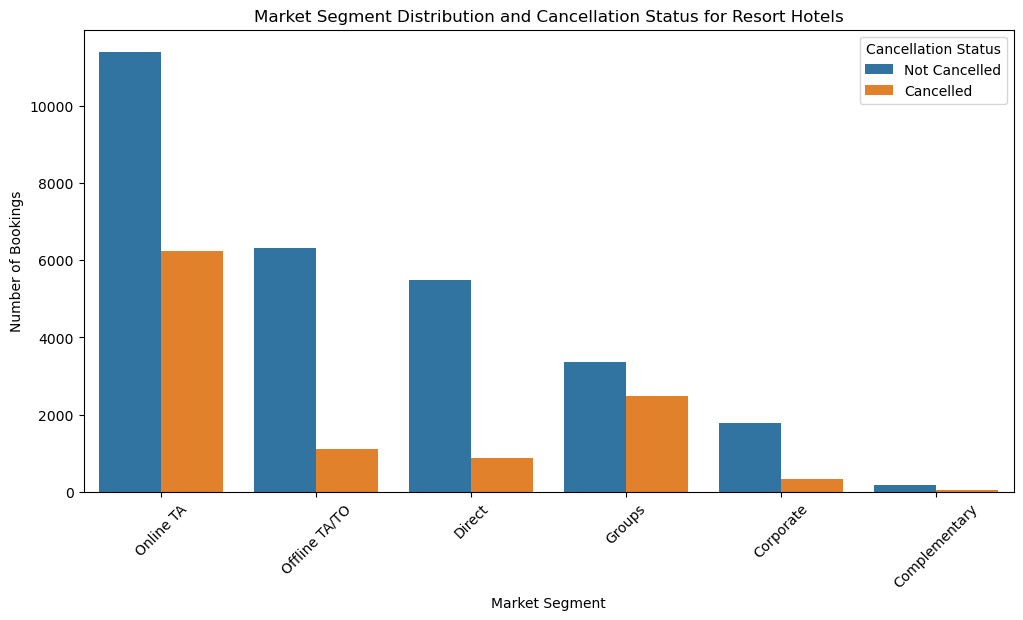

In [34]:
# Ensure the market segment value counts are calculated
resort_market_segment_counts = Resort_Hotel['market_segment'].value_counts()

# Print the value counts for market segments in Resort Hotels
print(resort_market_segment_counts)


# Create a bar plot showing the market segment distribution and cancellation status
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=Resort_Hotel, order=resort_market_segment_counts.index)
plt.title("Market Segment Distribution and Cancellation Status for Resort Hotels")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'])
plt.show()

In [40]:
print(Resort_Hotel['is_canceled'].value_counts(normalize = True))
print(Resort_Hotel[Resort_Hotel['market_segment']=="Online TA"]['is_canceled'].value_counts(normalize =True),
Resort_Hotel[Resort_Hotel['market_segment']=="Offline TA/TO"]['is_canceled'].value_counts(normalize =True),
Resort_Hotel[Resort_Hotel['market_segment']=="Direct"]['is_canceled'].value_counts(normalize =True),
Resort_Hotel[Resort_Hotel['market_segment']=="Groups"]['is_canceled'].value_counts(normalize =True),
Resort_Hotel[Resort_Hotel['market_segment']=="Corporate"]['is_canceled'].value_counts(normalize =True),
Resort_Hotel[Resort_Hotel['market_segment']=="Complementary"]['is_canceled'].value_counts(normalize =True))

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64
is_canceled
0    0.646106
1    0.353894
Name: proportion, dtype: float64 is_canceled
0    0.849334
1    0.150666
Name: proportion, dtype: float64 is_canceled
0    0.86393
1    0.13607
Name: proportion, dtype: float64 is_canceled
0    0.575789
1    0.424211
Name: proportion, dtype: float64 is_canceled
0    0.841016
1    0.158984
Name: proportion, dtype: float64 is_canceled
0    0.834171
1    0.165829
Name: proportion, dtype: float64


market_segment
Online TA        38747
Offline TA/TO    16732
Groups           13974
Direct            6091
Corporate         2985
Complementary      535
Aviation           237
Name: count, dtype: int64


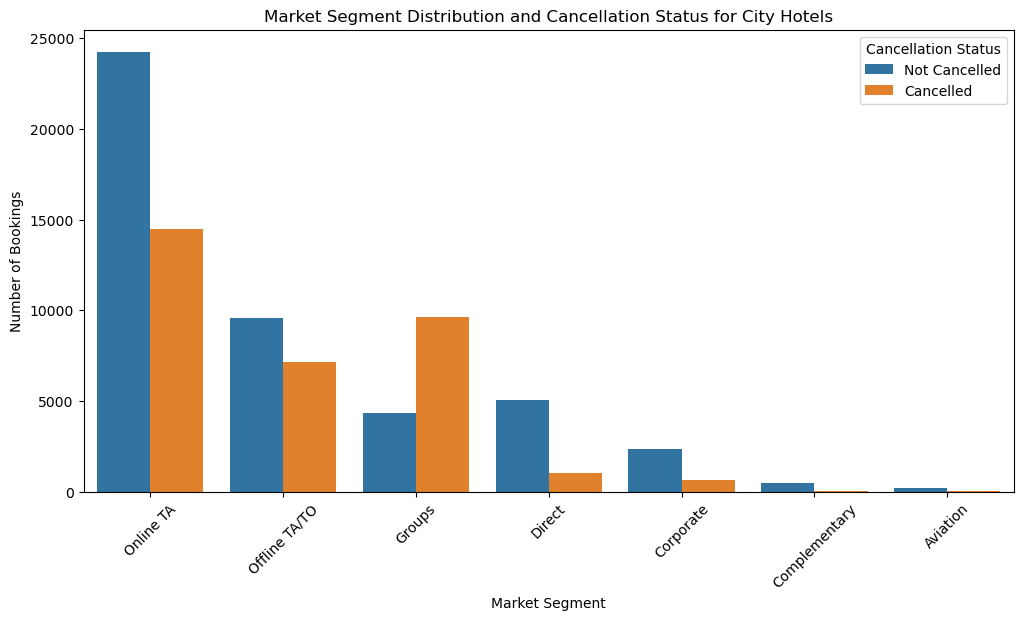

In [35]:
print(City_Hotel['market_segment'].value_counts())

# Create a bar plot showing the market segment distribution and cancellation status
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=City_Hotel, order=City_Hotel['market_segment'].value_counts().index)
plt.title("Market Segment Distribution and Cancellation Status for City Hotels")
plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'])
plt.show()

In [41]:
print(City_Hotel['is_canceled'].value_counts(normalize = True))
print(City_Hotel[City_Hotel['market_segment']=="Online TA"]['is_canceled'].value_counts(normalize =True),
City_Hotel[City_Hotel['market_segment']=="Offline TA/TO"]['is_canceled'].value_counts(normalize =True),
City_Hotel[City_Hotel['market_segment']=="Direct"]['is_canceled'].value_counts(normalize =True),
City_Hotel[City_Hotel['market_segment']=="Groups"]['is_canceled'].value_counts(normalize =True),
City_Hotel[City_Hotel['market_segment']=="Corporate"]['is_canceled'].value_counts(normalize =True),
City_Hotel[City_Hotel['market_segment']=="Complementary"]['is_canceled'].value_counts(normalize =True))

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64
is_canceled
0    0.626036
1    0.373964
Name: proportion, dtype: float64 is_canceled
0    0.572197
1    0.427803
Name: proportion, dtype: float64 is_canceled
0    0.826794
1    0.173206
Name: proportion, dtype: float64 is_canceled
1    0.688636
0    0.311364
Name: proportion, dtype: float64 is_canceled
0    0.785595
1    0.214405
Name: proportion, dtype: float64 is_canceled
0    0.893458
1    0.106542
Name: proportion, dtype: float64


In [42]:
City_Hotel[City_Hotel['market_segment']=="Groups"]['is_canceled'].value_counts(normalize =True)

is_canceled
1    0.688636
0    0.311364
Name: proportion, dtype: float64

In [35]:
# Adr affect on hotels
Avg_resort_adr = Resort_Hotel.groupby('reservation_status_date')['adr'].mean()
Avg_city_adr = City_Hotel.groupby('reservation_status_date')['adr'].mean()

Avg_resort_adr, Avg_city_adr

(reservation_status_date
 2014-11-18      0.000000
 2015-01-01     61.966667
 2015-01-02      9.633750
 2015-01-18      0.000000
 2015-01-21     37.301209
                  ...    
 2017-09-08    101.012500
 2017-09-09    147.778333
 2017-09-10    145.272500
 2017-09-12    153.570000
 2017-09-14    105.930000
 Name: adr, Length: 913, dtype: float64,
 reservation_status_date
 2014-10-17     62.800000
 2015-01-01     62.063158
 2015-01-20     76.500000
 2015-01-30     61.400000
 2015-02-17     76.500000
                  ...    
 2017-09-03    137.172600
 2017-09-04    116.925385
 2017-09-05    154.000000
 2017-09-06     93.293333
 2017-09-07    159.685000
 Name: adr, Length: 864, dtype: float64)

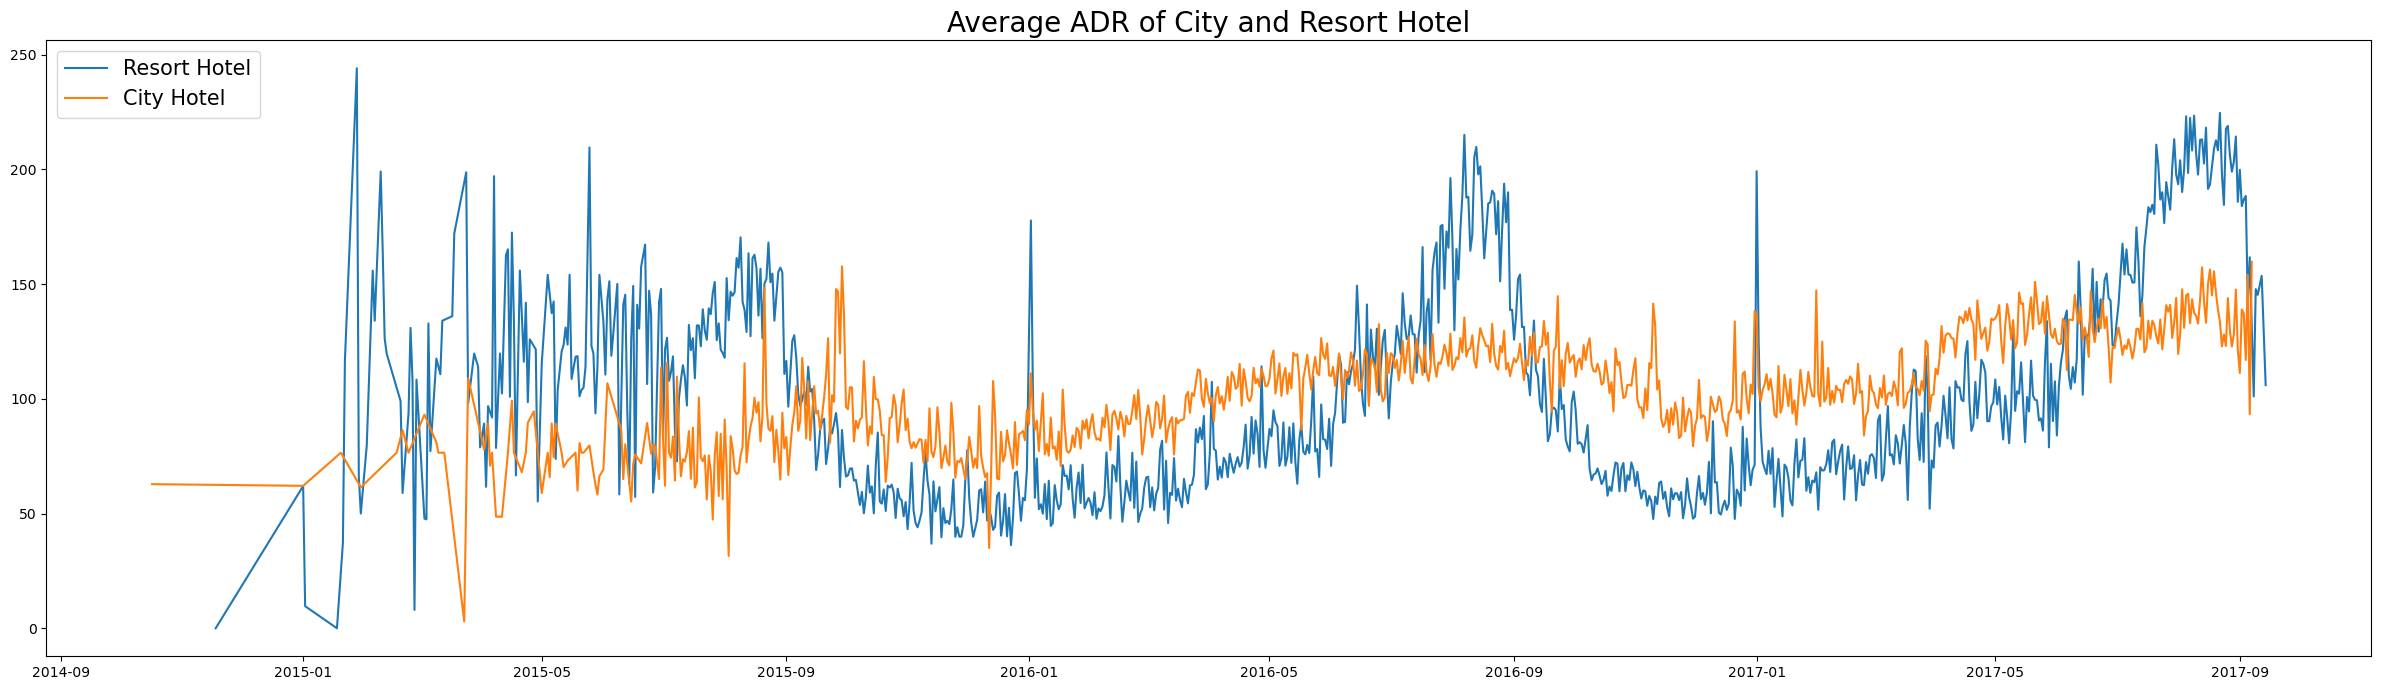

In [48]:
plt.figure(figsize=(30,8))
plt.title("Average ADR of City and Resort Hotel", fontsize=20)
plt.plot(Avg_resort_adr,label='Resort Hotel')
plt.plot(Avg_city_adr,label='City Hotel')
plt.legend(fontsize=15)


In [52]:
new_df1['reservation_status_date'].dt.year.unique()

array([2015, 2014, 2016, 2017])

In [53]:
year2015_df = new_df1[new_df1['reservation_status_date'].dt.year==2015]
year2014_df = new_df1[new_df1['reservation_status_date'].dt.year==2014]
year2016_df = new_df1[new_df1['reservation_status_date'].dt.year==2016]
year2017_df = new_df1[new_df1['reservation_status_date'].dt.year==2017]


Text(0, 0.5, 'Count')

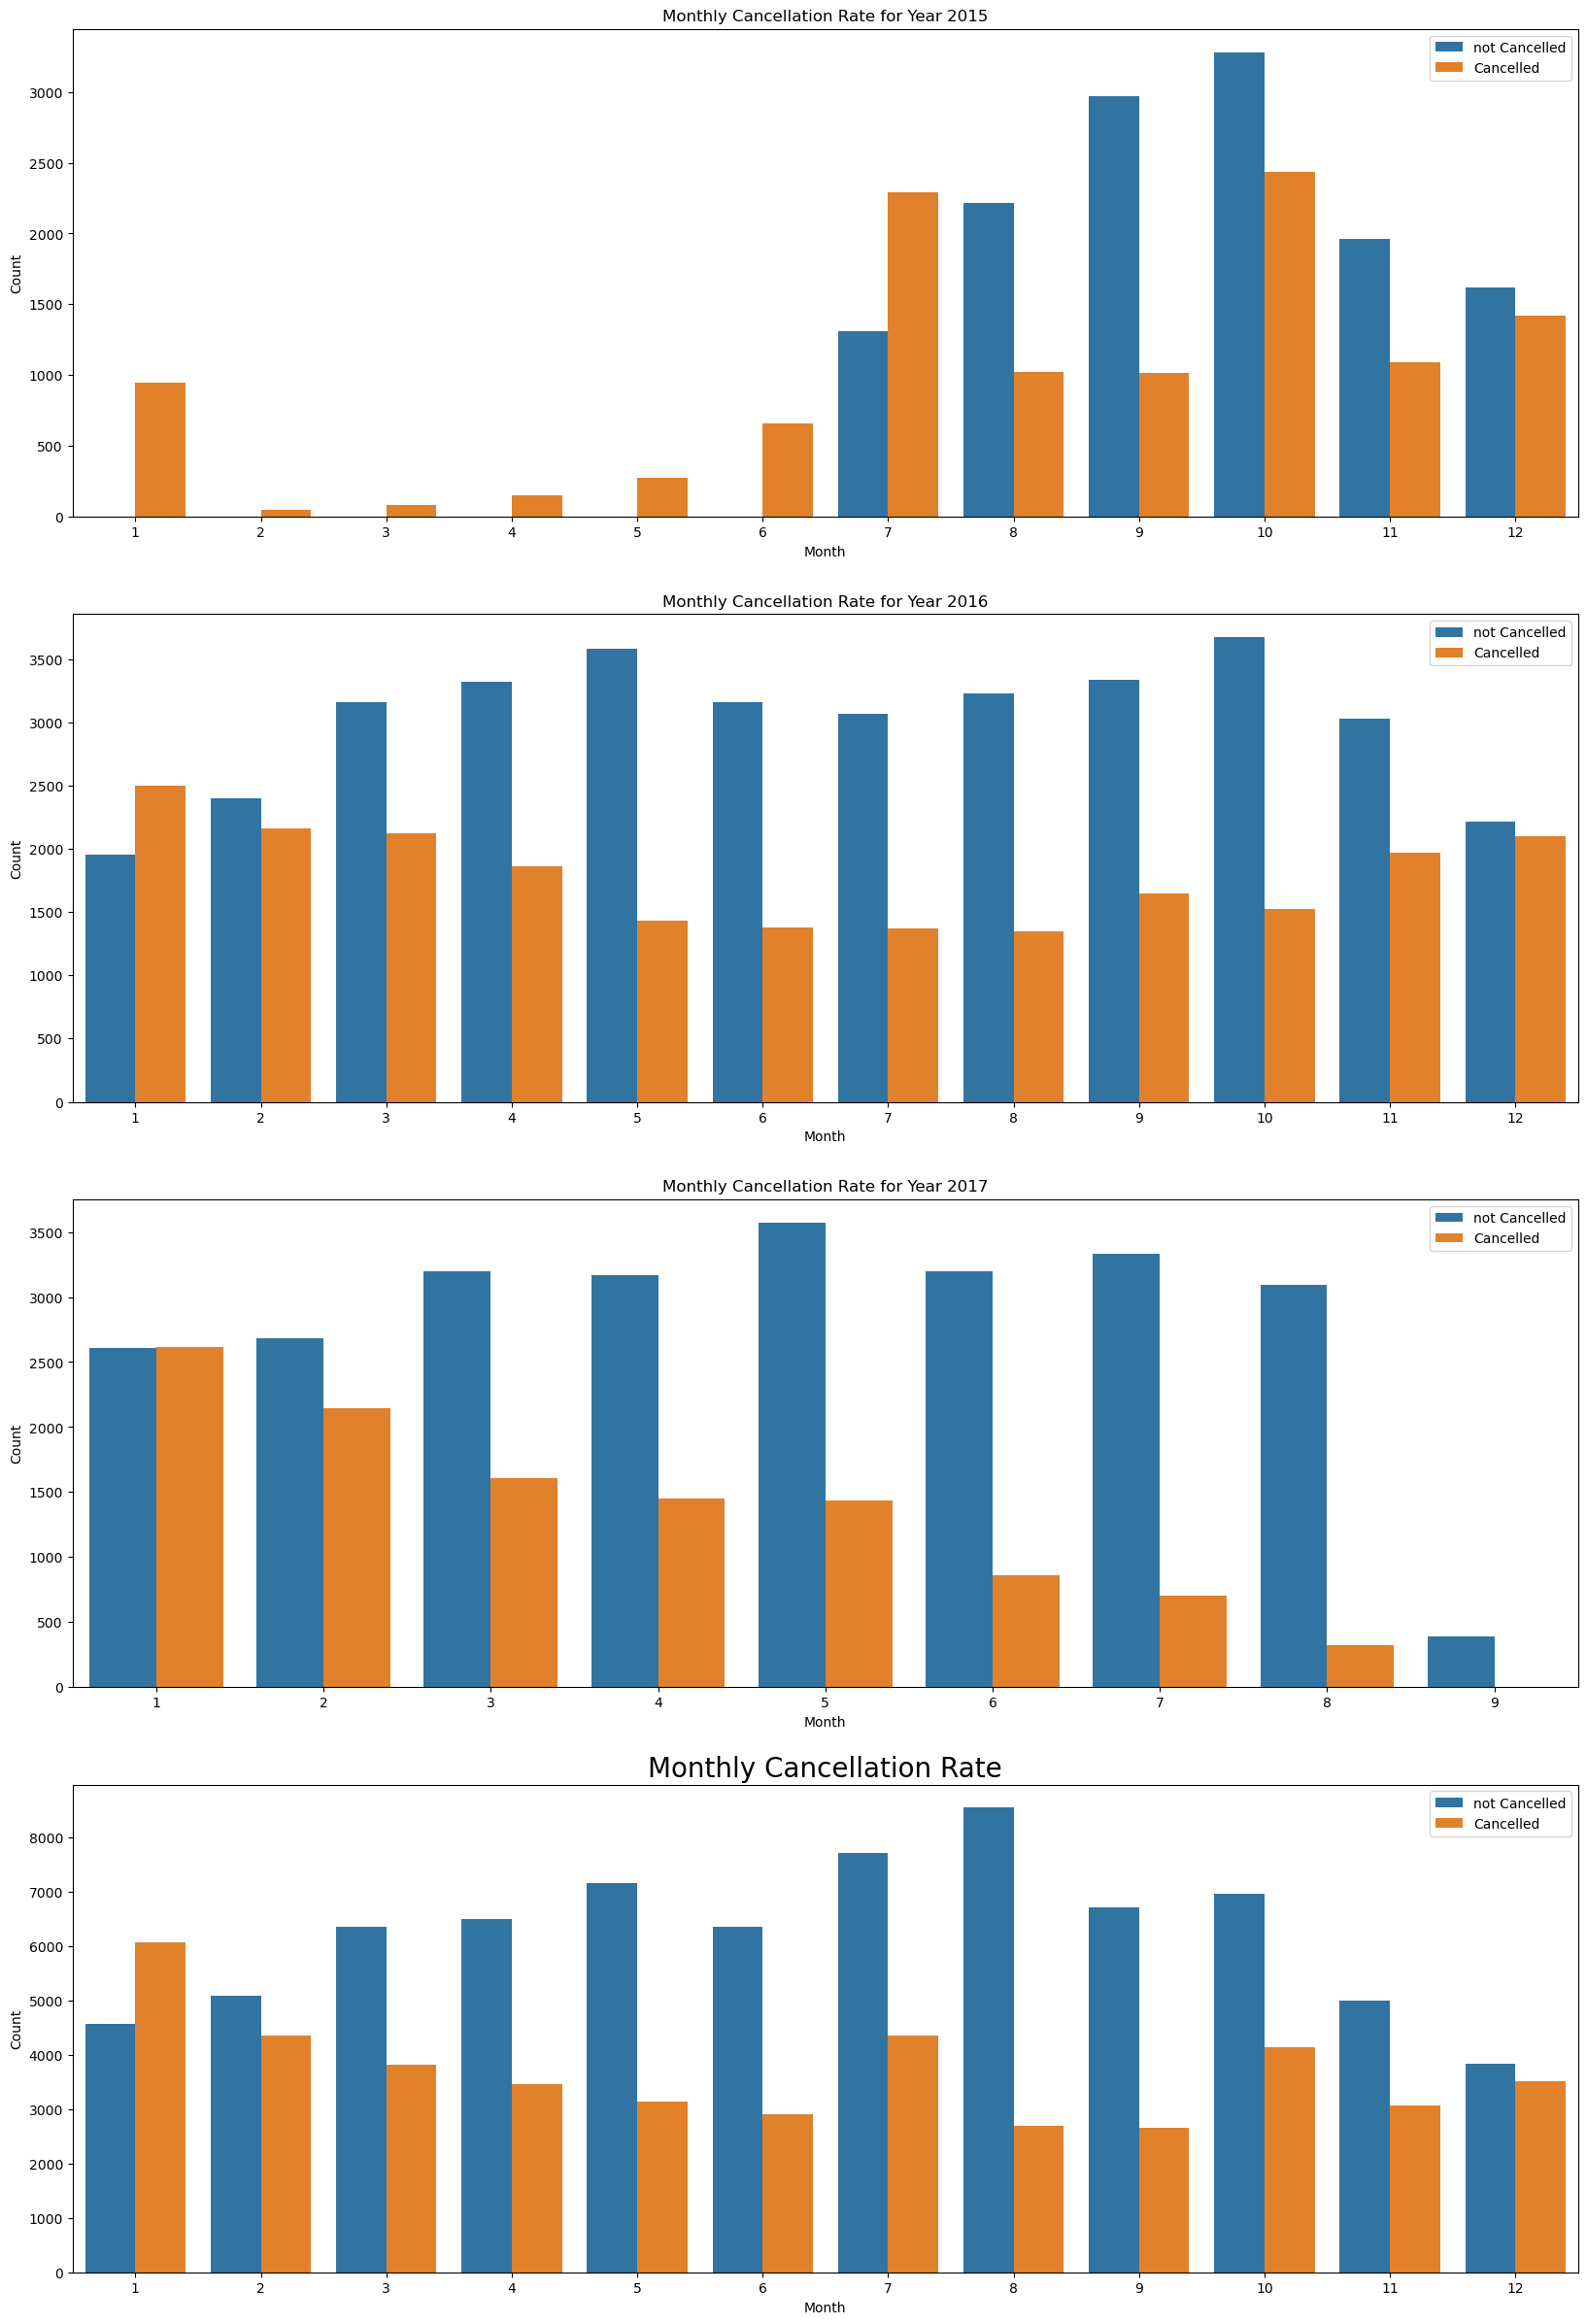

In [69]:
year2015_df['month'] = year2015_df['reservation_status_date'].dt.month
year2014_df['month'] = year2014_df['reservation_status_date'].dt.month
year2016_df['month'] = year2016_df['reservation_status_date'].dt.month
year2017_df['month'] = year2017_df['reservation_status_date'].dt.month
new_df1['month'] = new_df1['reservation_status_date'].dt.month

plt.figure(figsize = (20,30))

# Plot for 2015
plt.subplot(4, 1, 1)
sns.countplot(x=year2015_df['month'], hue=year2015_df['is_canceled'])
plt.legend(['not Cancelled','Cancelled'])
plt.title("Monthly Cancellation Rate for Year 2015")
plt.xlabel("Month")
plt.ylabel("Count")

# Plot for 2016
plt.subplot(4, 1, 2)
sns.countplot(x=year2016_df['month'], hue=year2016_df['is_canceled'])
plt.legend(['not Cancelled','Cancelled'])
plt.title("Monthly Cancellation Rate for Year 2016")
plt.xlabel("Month")
plt.ylabel("Count")

# Plot for 2017
plt.subplot(4, 1, 3)
sns.countplot(x=year2017_df['month'], hue=year2017_df['is_canceled'])
plt.legend(['not Cancelled','Cancelled'])
plt.title("Monthly Cancellation Rate for Year 2017")
plt.xlabel("Month")
plt.ylabel("Count")


plt.subplot(4, 1, 4)
sns.countplot(x='month', hue='is_canceled' , data = new_df1)
plt.legend(['not Cancelled','Cancelled'])
plt.title("Overall Monthly Cancellation Rate",fontsize=20)
plt.xlabel("Month")
plt.ylabel("Count")

Text(0, 0.5, 'ADR')

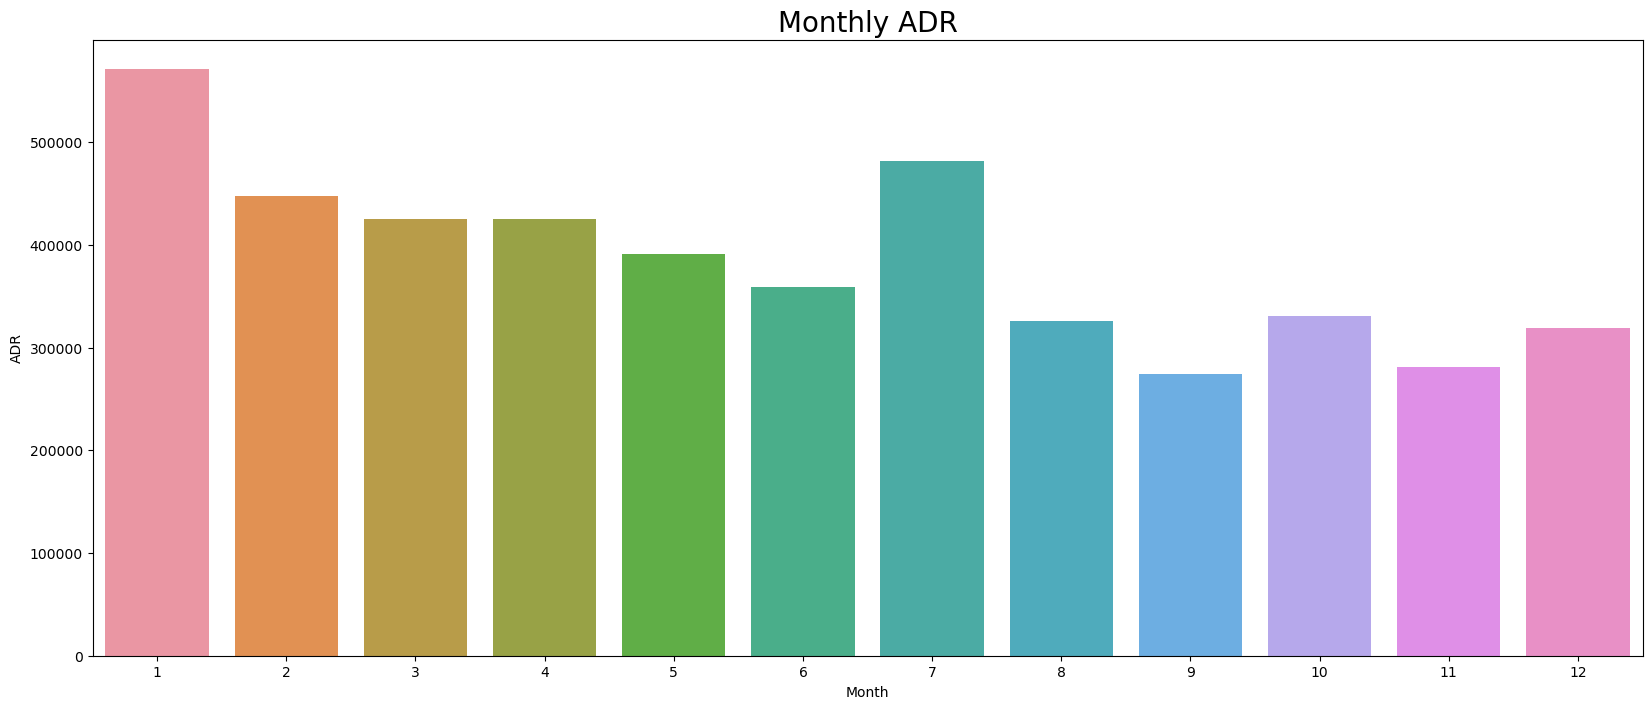

In [106]:
plt.figure(figsize=(20,8))

plt.subplot(1, 1, 1)
sns.barplot(x='month',y='adr', data =new_df1[new_df1['is_canceled']==1].groupby('month')['adr'].sum().reset_index())
plt.title("Monthly ADR", fontsize=20)
plt.xlabel("Month")
plt.ylabel("ADR")


In [71]:
new_df1[new_df1['is_canceled']==1].groupby('month')['adr'].sum()

month
1     571203.57
2     447675.76
3     424872.56
4     425315.23
5     391438.08
6     359003.34
7     481376.17
8     325668.43
9     274176.33
10    330968.87
11    281367.90
12    319272.65
Name: adr, dtype: float64

([<matplotlib.patches.Wedge at 0x208ef00b760>,
 [Text(-0.6780206570282319, 0.9288638159832715, 'PRT'),
  Text(-0.12452901505974424, -1.0929284168728757, 'GBR'),
  Text(0.2795827699816853, -1.0638766257087182, 'ESP'),
  Text(0.6082427774650023, -0.9165373553007318, 'FRA'),
  Text(0.8244337697170071, -0.7282231521657391, 'ITA'),
  Text(0.9549224064682716, -0.5460065911917595, 'DEU'),
  Text(1.0312598327523899, -0.38275730868464564, 'IRL'),
  Text(1.0729025706347506, -0.24265216653750293, 'BRA'),
  Text(1.0926161903610716, -0.12723938290033737, 'USA'),
  Text(1.0992090719340442, -0.041706308610296686, 'BEL')],
 [Text(-0.38322906701595716, 0.5250099829470665, '70.07'),
  Text(-0.06792491730531504, -0.5961427728397503, '6.25'),
  Text(0.1524996927172829, -0.5802963412956644, '5.54'),
  Text(0.331768787708183, -0.49992946652767184, '4.93'),
  Text(0.44969114711836744, -0.39721262845403943, '3.39'),
  Text(0.5208667671645117, -0.297821777013687, '3.10'),
  Text(0.5625053633194853, -0.20877671

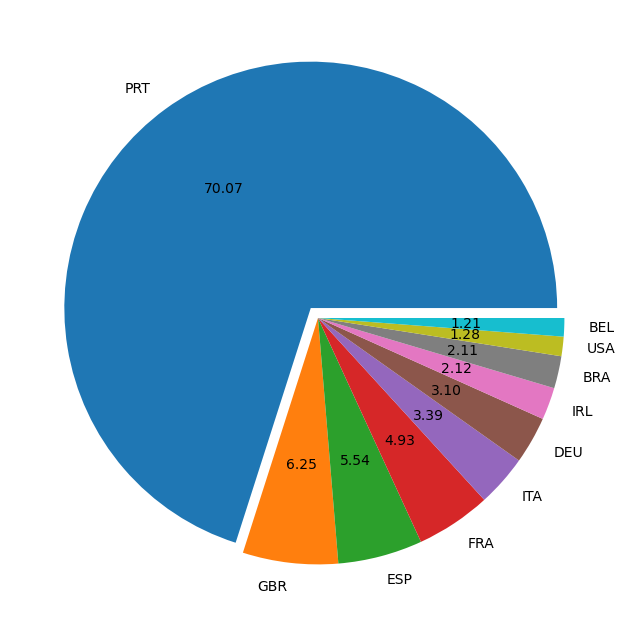

In [96]:
# top 10 countries with high cancellation rate
top10_cancel_country = new_df1[new_df1['is_canceled']==1]['country'].value_counts()[0:10]

plt.figure(figsize=(16,8))
plt.pie(top10_cancel_country,explode=[0.05, 0, 0, 0,0,0,0,0,0,0], labels=top10_cancel_country.index,autopct='%.2f')

In [97]:
new_df1['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [100]:
new_df1['market_segment'].value_counts(normalize=True)*100

market_segment
Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: proportion, dtype: float64

In [103]:
new_df1[new_df1['is_canceled']==1]['market_segment'].value_counts(normalize=True)*100

market_segment
Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: proportion, dtype: float64